# Quick Start for Segment Anything with Microscopy

This notebook shows how to get quickly started with `µsam` (Segment Anything for Microscopy).

Here, we show the very basic necessary functions to automatically segment a microscopy image using [µsam](https://github.com/computational-cell-analytics/micro-sam).  

# Running this notebook

If you have an environment with `µsam` on your computer you can run this notebook in there. You can follow the [installation instructions](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#installation) to install it on your computer.

You can also run this notebook in the cloud on [Kaggle Notebooks](https://www.kaggle.com/code/). This service offers free usage of a GPU to speed up running the code. The next cells will take care of the installation for you if you are using it. You can skip them if you have `micro_sam` installed.

## Install `condacolab` for Package Management

**IMPORTANT**: This step is only necessary if you are running this notebook in Kaggle Notebooks (tested) / Google Colab. **Please skip these cells and go to `Checking system information` if you are running the notebook on your own computer.**

The first step for running the notebook on the above mentioned cloud platforms is to have a package manager to install `µsam` and other relevant packages.

**NOTE**: Please run the next two cells one after the other.

In [1]:
# Step 1: Install `condacolab` on Kaggle Notebooks (tested) / Google Colab for installing conda and other related package managers.
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


**NOTE**: When you run the previous code cell, the kernel has restarted automatically in Kaggle Notebooks (tested). Please proceed further without the need of any manual kernel restarts.

In [1]:
# Step 2: Validate if `condacolab` was installed correctly.
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


If you see `✨🍰✨ Everything looks OK!` in the previous cell's output, you are good to proceed the next cell!

## Checking system information

In [2]:
# Check if we are running this notebook on kaggle, google colab or local compute resources.
import os
current_spot = os.getcwd()

if current_spot.startswith("/kaggle/working"):
    print("Kaggle says hi!")
    root_dir = "/kaggle/working"

elif current_spot.startswith("/content"):
    print("Google Colab says hi!")
    print(" NOTE: The scripts have not been tested on Google Colab, you might need to adapt the installations a bit.")
    root_dir = "/content"

else:
    msg = "You are using a behind-the-scenes resource. Follow our installation instructions here:"
    msg += " https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#installation"
    print(msg)
    root_dir = ""  # overwrite to set the root directory, where the data, checkpoints, and all relevant stuff will be stored

Kaggle says hi!


### Installation

The next cells will install the `micro_sam` library on Kaggle Notebooks. **Please skip these cells and go to `Importing the libraries` if you are running the notebook on your own computer.**

In [3]:
# Install `micro-sam` and `stackview` (https://github.com/haesleinhuepf/stackview) from `conda-forge`.
!mamba install -y -q -c conda-forge micro_sam stackview > /dev/null 2>&1
!pip uninstall -y --quiet napari  # GUI backends are not supported in Kaggle / Google Colab, let's remove it to avoid errors.

Known Issues on **Kaggle Notebooks** (for the `Importing the libraries` section below):

1. ```bash
    2024-05-08 14:56:42.941557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
    2024-05-08 14:56:42.941680: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
    2024-05-08 14:56:43.062385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
    ```

    - We have received this warning while testing this notebook on Kaggle. We suspect that the complains originate from the tensorflow suite. It does not lead to any issues while making use of the installed packages. You can proceed and ignore the warnings.

# Quick Start Playground

This section takes you forward to get quickly started with `µsam`.

## Importing the libraries

In [4]:
import stackview

from skimage.data import cells3d

from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation

2025-04-25 11:26:45.843156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745580406.038269     172 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745580406.093288     172 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


We load an example image from the [scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html) library.

StackViewNDArray([[4496, 5212, 6863, ..., 2917, 2680, 2642],
                  [4533, 5146, 7555, ..., 2843, 2857, 2748],
                  [4640, 6082, 8452, ..., 3372, 3039, 3128],
                  ...,
                  [1339, 1403, 1359, ..., 4458, 4314, 4795],
                  [1473, 1560, 1622, ..., 3967, 4531, 4204],
                  [1380, 1368, 1649, ..., 3091, 3558, 3682]], dtype=uint16)
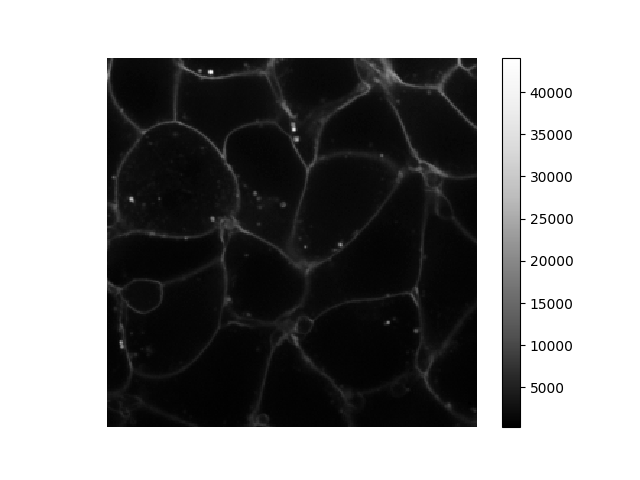
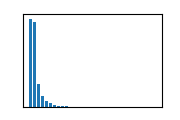

In [ ]:
image = cells3d()[30, 0]

# Visualize the image.
stackview.insight(image)

Loading a pre-trained micro-sam model and applying it to an image just takes two lines of python code:

100%|████████████████████████████████████████| 375M/375M [00:00<00:00, 407GB/s]
100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 68.6GB/s]
Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]


StackViewNDArray([[ 6,  6,  6, ...,  5,  5,  5],
                  [ 6,  6,  6, ...,  5,  5,  5],
                  [ 6,  6,  6, ...,  5,  5,  5],
                  ...,
                  [39, 39, 39, ..., 37, 37, 37],
                  [39, 39, 39, ..., 37, 37, 37],
                  [39, 39, 39, ..., 37, 37, 37]], dtype=int32)
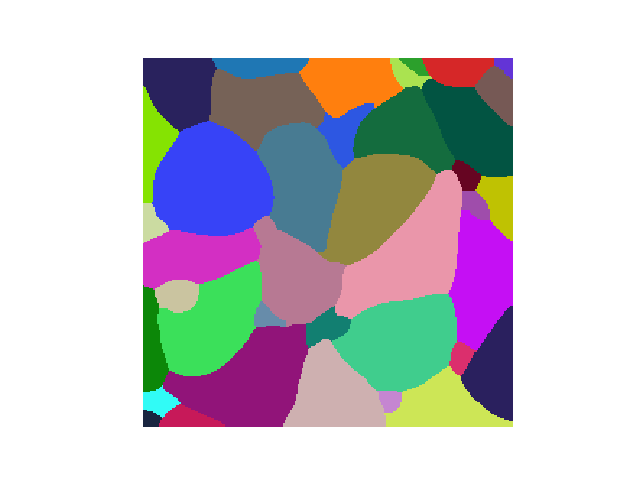

In [ ]:
# Load the Segment Anything for Microscopy model.
predictor, segmenter = get_predictor_and_segmenter(model_type="vit_b_lm")

# Run automatic instance segmentation (AIS) on our image.
instances = automatic_instance_segmentation(
    predictor=predictor,
    segmenter=segmenter,
    input_path=image,
)

# Visualize the instance segmentation result.
stackview.insight(instances)


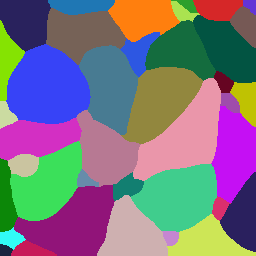

In [ ]:
# We can also quickly show the instance segmentation overlay using an animated curtain with 'stackview'.
stackview.animate_curtain(image, instances)

## What next?

Question: Are you happy with the segmentation on your data?
1. If your answer is "YES", looks like you are good to go with your segmentations. Feel free to test it on your data.
2. If you think there are missed out objects / incorrect segmentations, and there is room for improvement:
    1. We recommend you to use our napari-based [annotation tool](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#annotation-tools) to improve your segmentations.
    2. If you want to improve the automatic segmentation quality, we recommend you to finetune the default SAM models OR the `µsam` models, based on your initial assessment of the segmentation quality of both models.
3. If you think the models perform poorly, we recommend you to finetune the default SAM models on your custom dataset. There are two situations here:
    1. In case you do not have any ground-truth labels, we recommend generating the desired labels using our [annotator tool](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#annotation-tools)
    2. In case you do have ground-truth labels, we suggest going ahead with finetuning already (you can choose to use the [python scripts](https://github.com/computational-cell-analytics/micro-sam/blob/master/examples/finetuning/finetune_hela.py) or the [tool](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#finetuning-ui) or the [CLI](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#using-the-command-line-interface-cli) for this.)

[Here](https://github.com/computational-cell-analytics/micro-sam/blob/master/notebooks/sam_finetuning.ipynb) is the link to the notebook on how to get quickly started with finetuning on your custom dataset.

*This notebook was last ran on April 25, 2025*